# Mini-Project for Fundamentals of Machine Learning Course
In this study, facial expression recognition was performed on the face images from the Facial Expression Recognition Challenge (FER2013) dataset.

One motivation for representation learning is that learning algorithms can design features more effectively and efficiently than humans can. However, this challenge does not explicitly require entries to use representation learning. The dataset, assembled from the internet, is designed for facial expression classification.

The data consists of grayscale images of faces, each measuring 48x48 pixels. The faces have been automatically aligned to be roughly centered and occupy a similar area within each image. The task is to categorize each face based on the emotion expressed, assigning it to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains a total of 35,887 examples.

## 1. Prerequisite
This section provides some basic steps for accessing and visualizing the dataset.

In [95]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [96]:
def parse_data(data: pd.DataFrame):
    """
    Reads input dataframe then return arrays of images and labels
    """
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))
    
    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image
        
    return image_array, image_label

In [97]:
def show_img(images: np.ndarray, labels: np.ndarray):
    """
    Visualize images and labels respectively
    """
    _, axarr=plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
    axarr=axarr.flatten()
    for idx, label in enumerate(labels[:10]):
        axarr[idx].imshow(images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Label:{}".format(label))

In [98]:
## load dataset here
df = pd.read_csv("/home/thoanghuynh/Documents/git_repos/NMMH-4CE/materials/icml_face_data.csv")
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
dtypes: int64(1), object(1)
memory usage: 560.9+ KB


In [100]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum()) 

Missing values:
emotion    0
pixels     0
dtype: int64


In [101]:
# Check for outliers in emotion (assuming valid emotions are 0-9)
q1 = df['emotion'].quantile(0.25)
q3 = df['emotion'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['emotion'] < lower_bound) | (df['emotion'] > upper_bound)]
print(f"Number of outliers in emotion: {len(outliers)}")


Number of outliers in emotion: 0


In [73]:
# Check unique emotion values
print(df['emotion'].unique())


[0 2 4 6 3 5 1]


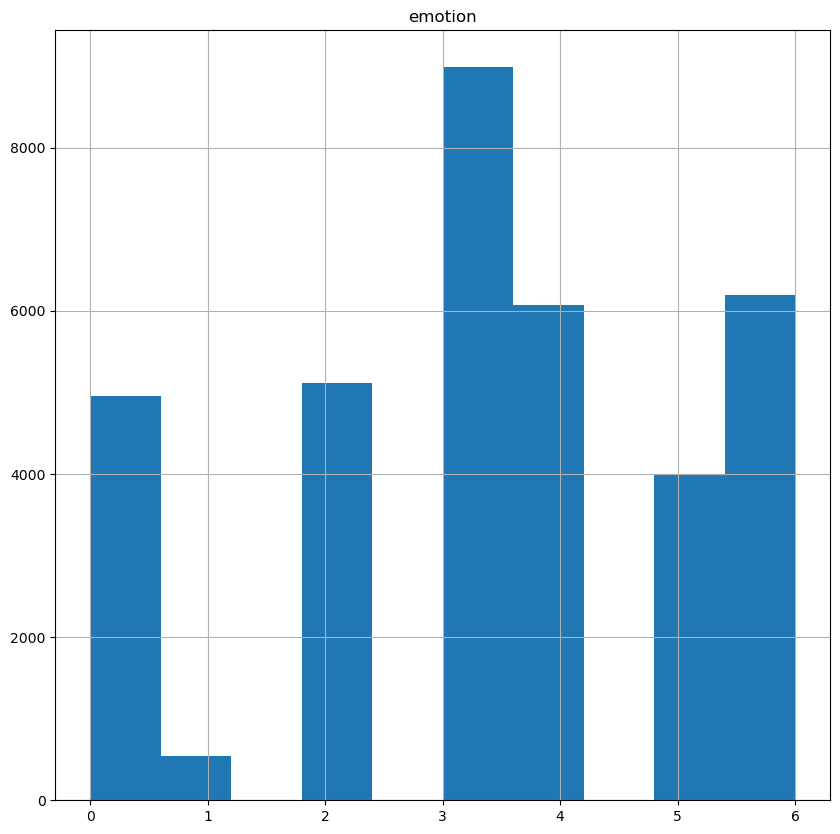

In [102]:
# Visualize data distribution (optional)
df.hist(figsize=(10, 10))
plt.show()


The ```emotion``` column contains a numeric code ranging from 0 to 6, inclusive, for the emotion expressed by the image. The "pixels" column contains a string surrounded in quotes for each image.

In [104]:
## parsing data here
images, labels = parse_data(df)


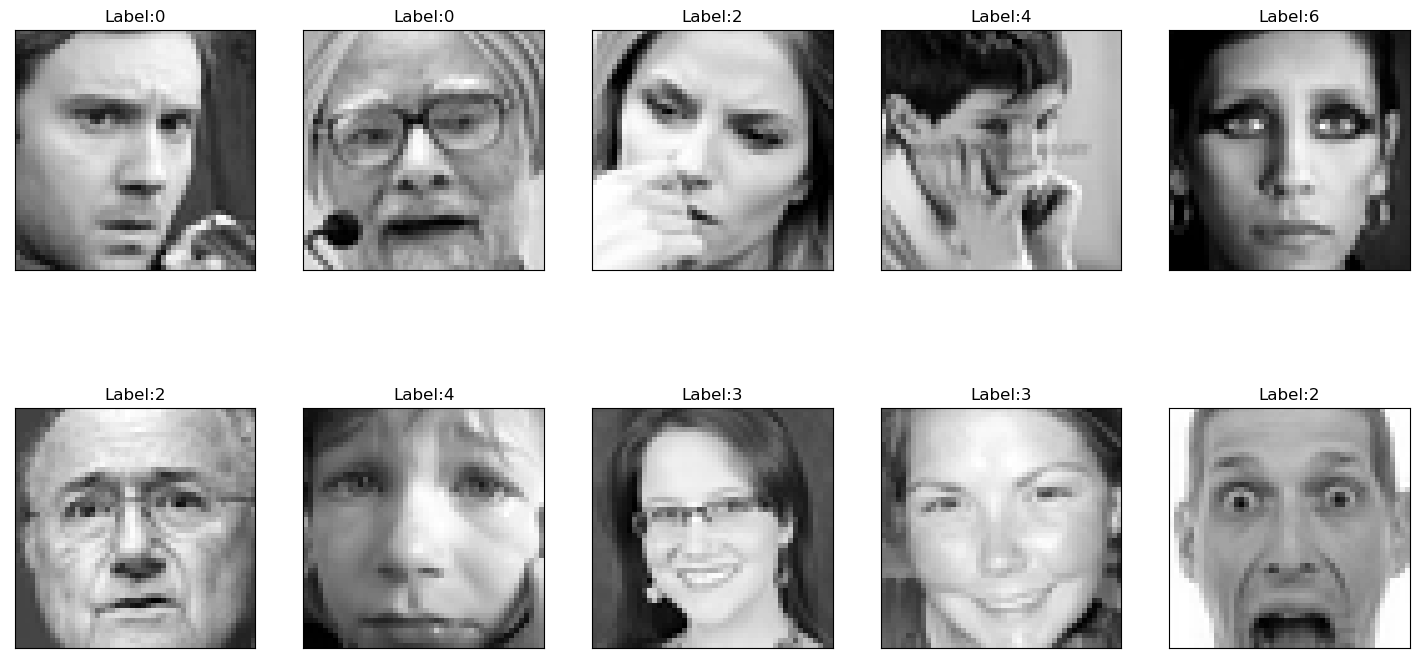

In [105]:
## showing images here
show_img(images, labels)

In [106]:
images.shape

(35887, 48, 48)

## 2. Principle Component Analysis

Unsupervised learning can be further categorized into two main tasks: data transformation and clustering. In this study, we will focus on data transformation using unsupervised learning techniques. These techniques aim to modify the data to make it easier for computers and humans to analyze and understand.

One of the most common applications of unsupervised data transformation is dimensionality reduction. This process reduces the number of features (dimensions) in the data. When the data has a high number of features, it can be computationally expensive and difficult to analyze. Dimensionality reduction techniques help to overcome these challenges.

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction. It transforms the data into a new set of features called principal components (PCs). These PCs are ordered by their importance, capturing the most significant variations in the data. By selecting a subset of the most informative PCs, we can achieve a significant reduction in data size while preserving the essential information for analysis.

Question 1: Can you visualize the data projected onto two principal components? (2 points)

(35887, 2)


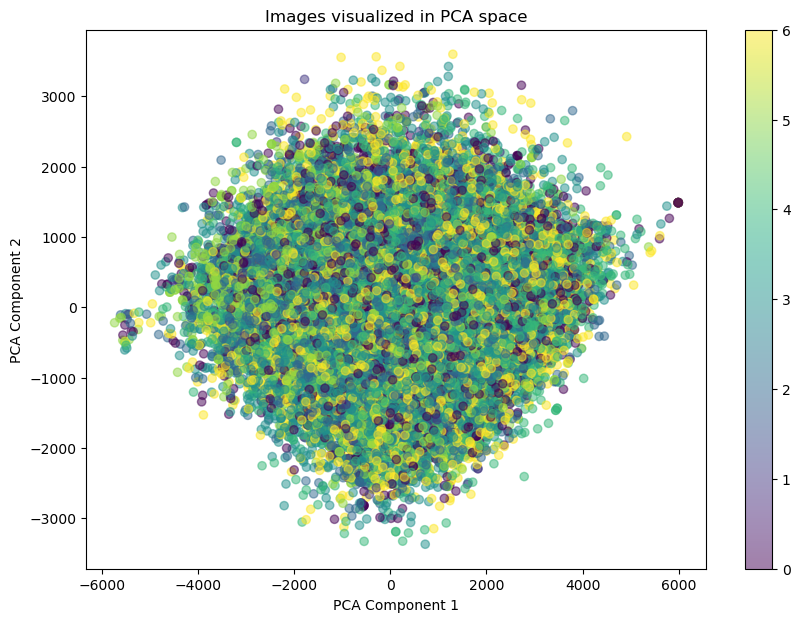

In [107]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Reshape the images array for PCA
num_images = images.shape[0]
reshaped_images = images.reshape(num_images, 48 * 48)

# data scaling
x_scaled = StandardScaler().fit_transform(reshaped_images)

# Apply PCA
pca = PCA(n_components=2)
pca.fit(reshaped_images)

# Transform for visualizing here
images_pca = pca.transform(reshaped_images)
print(images_pca.shape)  # Should print (num_images, 2)

# Optionally, you can visualize the transformed images in the PCA space
plt.figure(figsize=(10, 7))
plt.scatter(images_pca[:, 0], images_pca[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.colorbar()
plt.title('Images visualized in PCA space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [108]:
images_pca.shape

(35887, 2)

In [109]:
images.shape

(35887, 48, 48)

In [110]:
images_labels=pd.DataFrame(images_pca)
images_labels['label']=labels
images_labels.head()

,0,1,label
0,691.750859,-442.328649,0
1,-62.025489,561.762203,0
2,-1322.538070,-415.729685,2
3,-232.277887,656.803933,4
4,1796.585834,-2005.093950,6


Question 2: How to determine the optimal number of principal components using ```pca.explained_variance_```? Explain your selection process. (2 points)

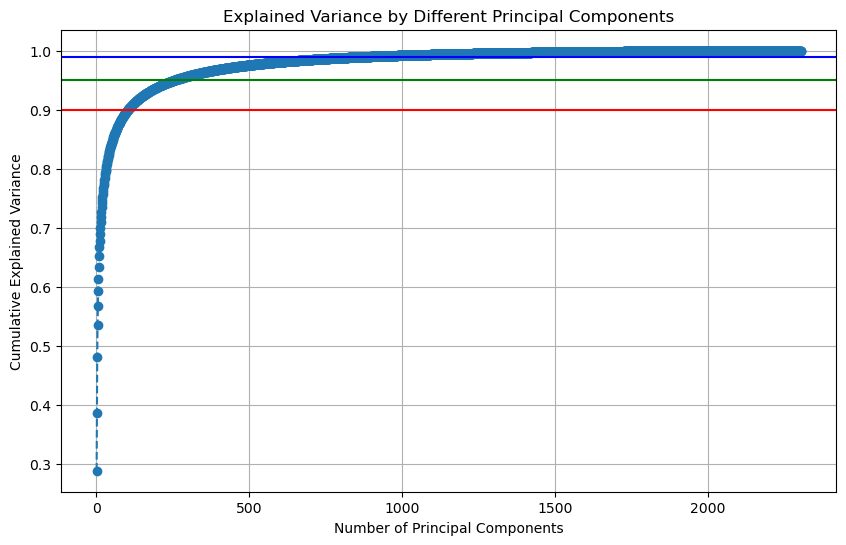

Optimal number of components for different explained variance thresholds:
90.0% explained variance: 104 components
95.0% explained variance: 255 components
99.0% explained variance: 887 components


In [116]:
# Apply PCA
pca = PCA()
pca.fit(reshaped_images)
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Different Principal Components')
plt.grid()
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axhline(y=0.95, color='g', linestyle='-')
plt.axhline(y=0.99, color='b', linestyle='-')
plt.show()

# Determine the optimal number of components for different thresholds
thresholds = [0.90, 0.95, 0.99]
optimal_components = {threshold: np.argmax(cumulative_explained_variance >= threshold) + 1 for threshold in thresholds}

print("Optimal number of components for different explained variance thresholds:")
for threshold, n_components in optimal_components.items():
    print(f"{threshold*100}% explained variance: {n_components} components")

#how to find the optimal number of components for PCA
#https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60


In [92]:
explained_variance_ratio

array([0.2892651, 0.0980239])

## 3. Image Classification

The classification task will compare the performance using both:

- Original data: The data before applying PCA.
- Transformed data: The data projected onto the optimal number of principal components identified earlier. Utilize the **optimal number of principal components** identified in the previous question.

Compare the performance of **4** different classification algorithms (3 machine learning and 1 MLP models) in both formats above. (4 points)

Perform hyperparameter tuning using ```GridSearchCV``` for each classification method. (1 point)

Inspiration: Draw inspiration from the example provided in the scikit-learn documentation: https://scikit-learn.org/dev/auto_examples/datasets/plot_iris_dataset.html

In [127]:
# Assuming 'images' is your dataset with shape (num_samples, height, width, channels)
# Flatten the images array to 2D
# Reshape the images array for PCA
num_images = images.shape[0]
images_reshaped = images.reshape(num_images, 48 * 48)


/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train accuracy (90.0% variance): 37.79%
Validation accuracy (90.0% variance): 37.55%
Test accuracy (90.0% variance): 36.00%


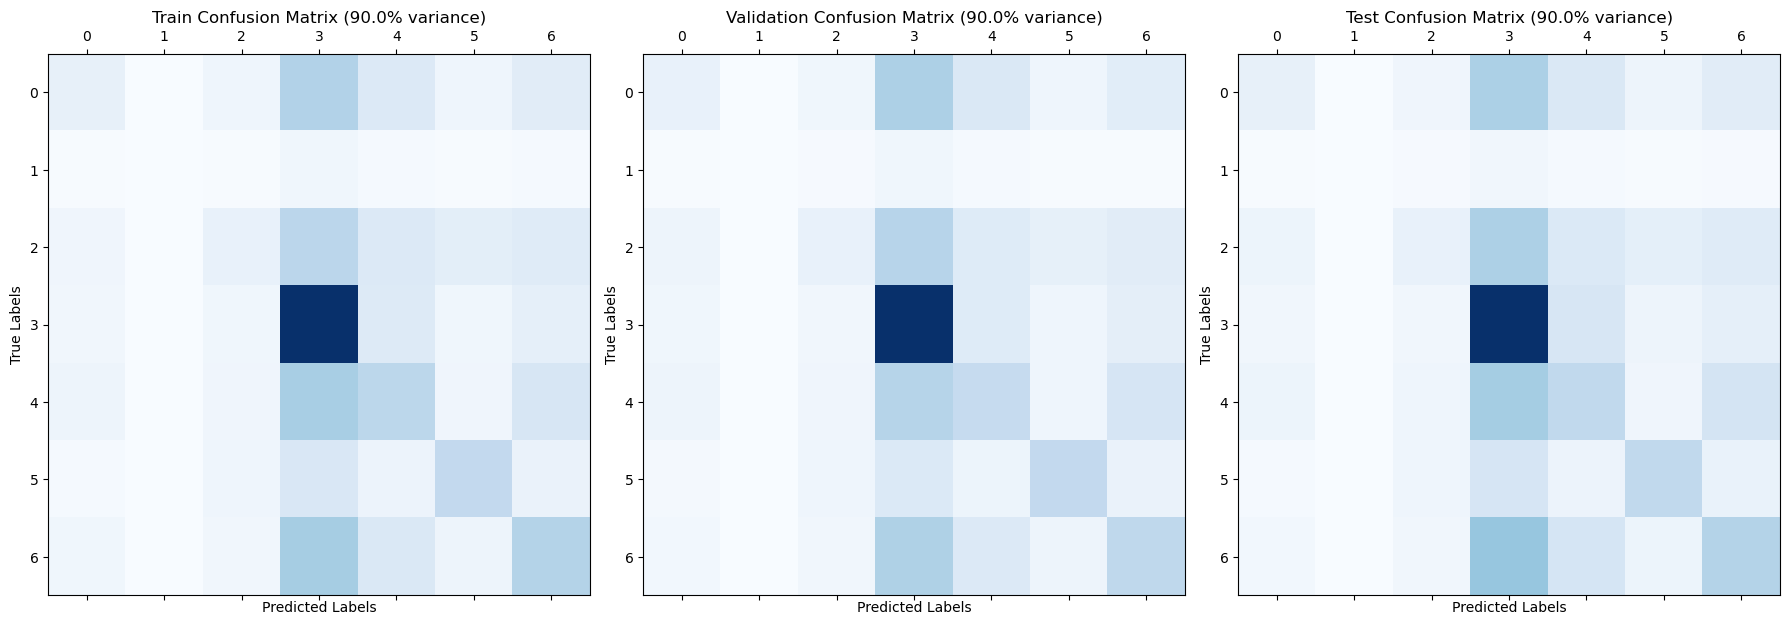

/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train accuracy (95.0% variance): 39.69%
Validation accuracy (95.0% variance): 37.35%
Test accuracy (95.0% variance): 36.26%


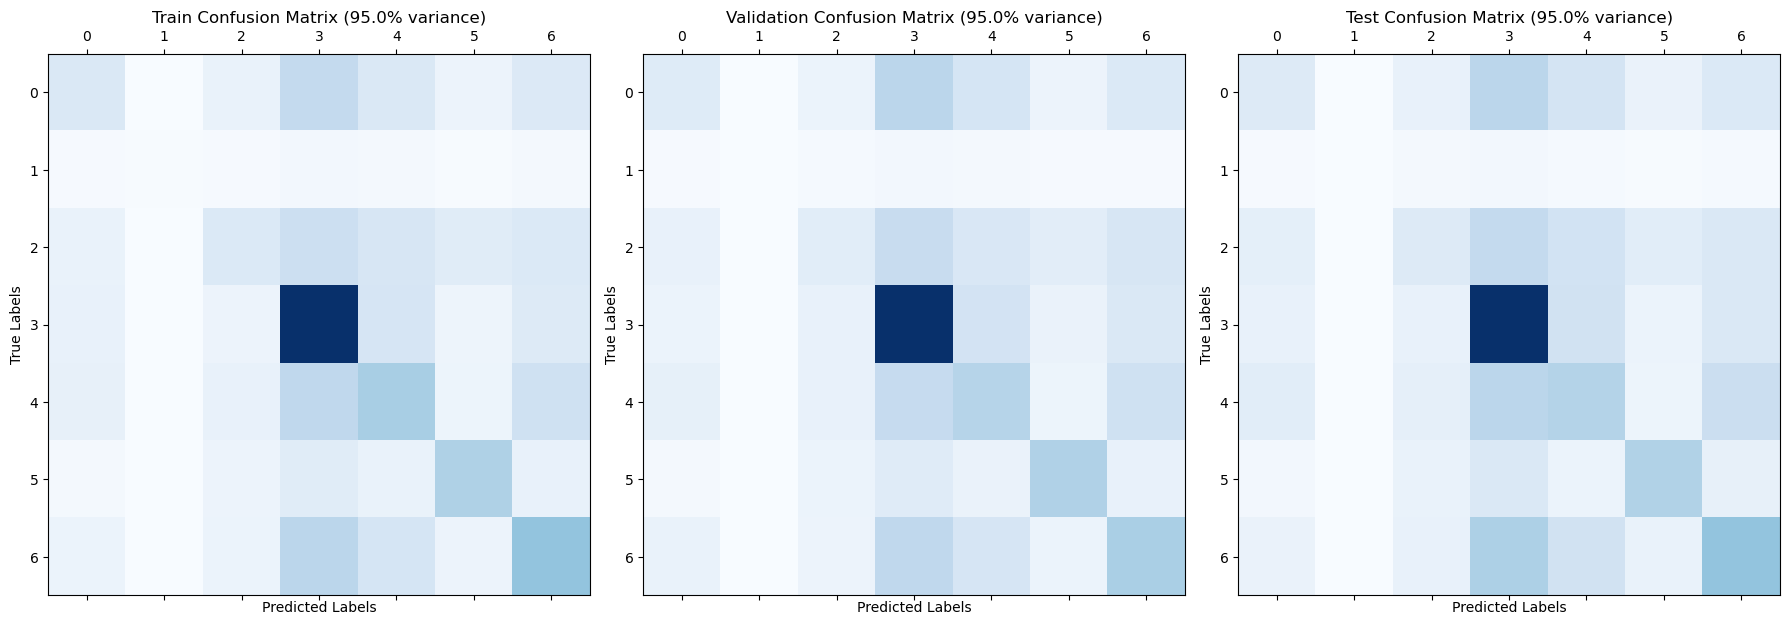

/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train accuracy (99.0% variance): 44.60%
Validation accuracy (99.0% variance): 35.00%
Test accuracy (99.0% variance): 35.51%


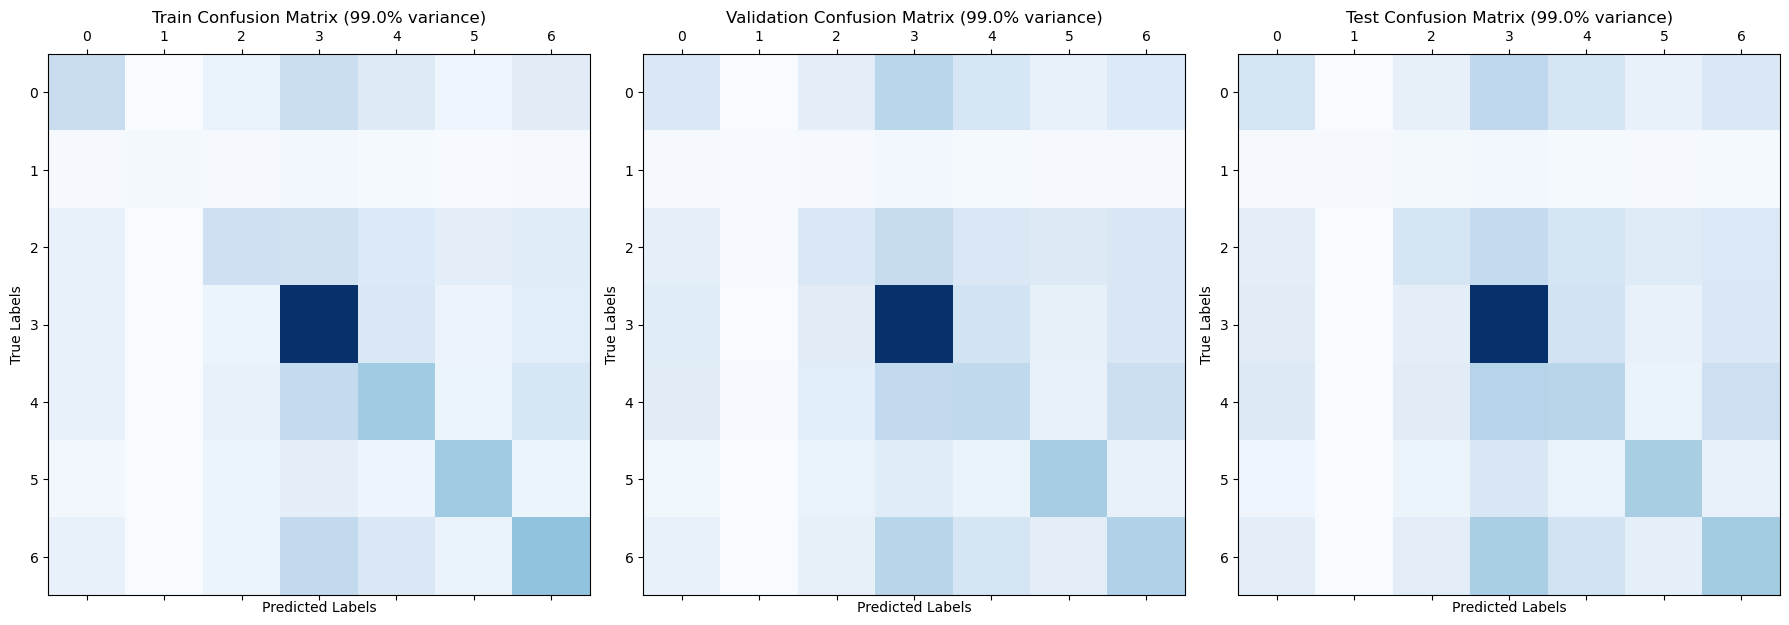

In [128]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Assuming 'images' is your dataset with shape (num_samples, height, width, channels)
# Assuming 'images_labels' is the array of labels

# Function to apply PCA, train and evaluate the model
def evaluate_pca_variance(images, labels, n_components, variance_threshold):
    pca = PCA(n_components=n_components)
    images_pca = pca.fit_transform(images)
    
    # Split the data into train, validation, and test sets
    X_train, X_test, y_train, y_test = train_test_split(images_pca, labels, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
    
    # Train the logistic regression model
    log_reg = LogisticRegression(max_iter=1000)
    log_reg.fit(X_train, y_train['label'])
    
    # Predict the labels
    train_preds = log_reg.predict(X_train)
    val_preds = log_reg.predict(X_val)
    test_preds = log_reg.predict(X_test)
    
    # Calculate the accuracy
    train_accuracy = accuracy_score(y_train['label'], train_preds)
    val_accuracy = accuracy_score(y_val['label'], val_preds)
    test_accuracy = accuracy_score(y_test['label'], test_preds)
    
    print(f"Train accuracy ({variance_threshold}% variance): {train_accuracy * 100:.2f}%")
    print(f"Validation accuracy ({variance_threshold}% variance): {val_accuracy * 100:.2f}%")
    print(f"Test accuracy ({variance_threshold}% variance): {test_accuracy * 100:.2f}%")
    
    # Calculate the confusion matrices
    train_confusion_matrix = confusion_matrix(y_train['label'], train_preds)
    val_confusion_matrix = confusion_matrix(y_val['label'], val_preds)
    test_confusion_matrix = confusion_matrix(y_test['label'], test_preds)
    
    # Plot the confusion matrices
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Train confusion matrix
    axes[0].matshow(train_confusion_matrix, cmap='Blues')
    axes[0].set_title(f'Train Confusion Matrix ({variance_threshold}% variance)')
    axes[0].set_xlabel('Predicted Labels')
    axes[0].set_ylabel('True Labels')

    # Validation confusion matrix
    axes[1].matshow(val_confusion_matrix, cmap='Blues')
    axes[1].set_title(f'Validation Confusion Matrix ({variance_threshold}% variance)')
    axes[1].set_xlabel('Predicted Labels')
    axes[1].set_ylabel('True Labels')

    # Test confusion matrix
    axes[2].matshow(test_confusion_matrix, cmap='Blues')
    axes[2].set_title(f'Test Confusion Matrix ({variance_threshold}% variance)')
    axes[2].set_xlabel('Predicted Labels')
    axes[2].set_ylabel('True Labels')

    plt.tight_layout()
    plt.show()

# Evaluate for 90% explained variance (104 components)
evaluate_pca_variance(images_reshaped, images_labels, 104, 90.0)

# Evaluate for 95% explained variance (255 components)
evaluate_pca_variance(images_reshaped, images_labels, 255, 95.0)

# Evaluate for 99% explained variance (887 components)
evaluate_pca_variance(images_reshaped, images_labels, 887, 99.0)


## 4. Evaluating Classification Performance

Compare the performance of the different classification models using various metrics: accuracy, precision, recall, and F1-score.
Based on the evaluation metrics, explain which model performs best and why. Identify the emotion category where the model makes the most accurate and most errors. (1 point)



In [ ]:
## visualize the confusion matrices and classification reports here